<h1>Taiwanese Credit Default</h1>
<p>In the world of credit cards, defaulting</p>
<p>The main object of this notebook is to detail the process of an end-to-end data science experiment, consisting additionally of any processes of iterative refinement to the experiment.</p>

<ol>
<li>Exploratory Data Analysis and Data Munging
<li>Baseline Modeling
<li>Model Selection
<li>Feature Engineering
<li>Model Tuning and Performance Analysis
<li>Final Insights
</ol>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1>Exploratory Data Analysis</h1>

<p>The data comes with the following features</p>

In [2]:
uci_dataset = pd.read_csv('UCI_credit_card.csv')
uci_dataset.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

              ...              BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
0             ...                    0.0        0.0        0.0       0.0   
1             ...                 3272.0     3455.0     3261.0       0.0   
2             ...                14331.0    14948.0    15549.0    1518.0   
3             ...                28314.0    28959.0    29547.0    2000.0   
4             ...                20940.0    19146.0    19131.0    2000.0   

   PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0     689.0       0.0       0.0       0.0       0.0   
1    1000.0    1000.0    1000.0       0.0    2000.0   
2    1500.0    1000.0    1000.0    1000.0    5000.0   
3    2019.0    1200.0    1100.0    1069.0    1000.0   
4   36681.0   10000.0    9000.0     689.0     679.0   

   default.payment.next.month  
0                           1  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 25 columns]

In [3]:
uci_dataset.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                AGE         PAY_0         PAY_2         PAY_3         PAY_4  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -0.220667   
std        9.217904      1.123802      1.197186      1.196868      1.169139   
min       21.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       28.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               30000.000000   30000.000000   
mean              ...               43262.948967   40311.400967   
std               ...               64332.856134   60797.155770   
min               ...             -170000.000000  -81334.000000   
25%               ...                2326.750000    1763.000000   
50%               ...               19052.000000   18104.500000   
75%               ...               54506.000000   50190.500000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2      PAY_AMT3  \
count   30000.000000   30000.000000  3.000000e+04   30000.00000   
mean    38871.760400    5663.580500  5.921163e+03    5225.68150   
std     59554.107537   16563.280354  2.304087e+04   17606.96147   
min   -339603.000000       0.000000  0.000000e+00       0.00000   
25%      1256.000000    1000.000000  8.330000e+02     390.00000   
50%     17071.000000    2100.000000  2.009000e+03    1800.00000   
75%     49198.250000    5006.000000  5.000000e+03    4505.00000   
max    961664.000000  873552.000000  1.684259e+06  896040.00000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default.payment.next.month  
count   30000.000000   30000.000000   30000.000000                30000.000000  
mean     4826.076867    4799.387633    5215.502567                    0.221200  
std     15666.159744   15278.305679   17777.465775                    0.415062  
min         0.000000       0.000000       0.000000                    0.000000  
25%       296.000000     252.500000     117.750000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4013.250000    4031.500000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 25 columns]

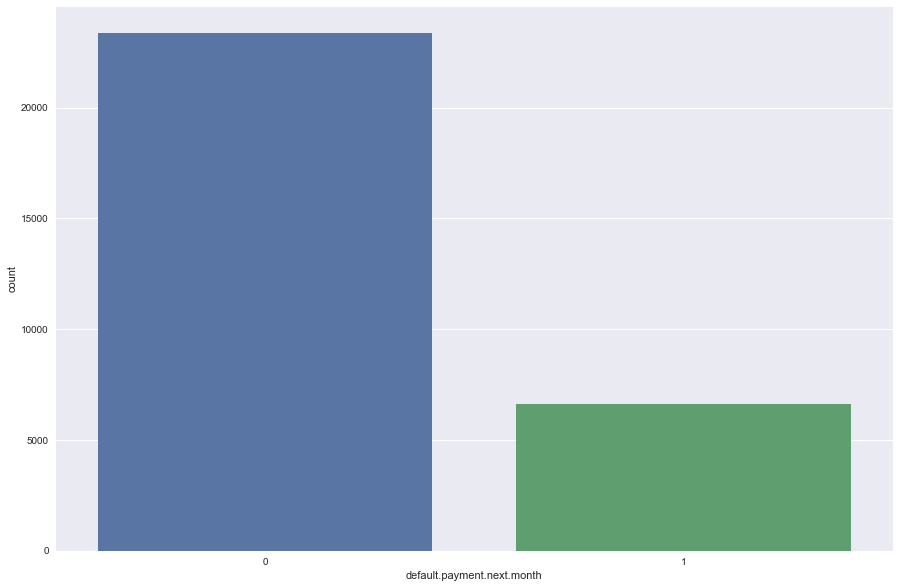

In [4]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
def_count = sns.countplot(uci_dataset['default.payment.next.month'])

Approximately 30% of the entire data set defaulted in the subsequent month of this data.

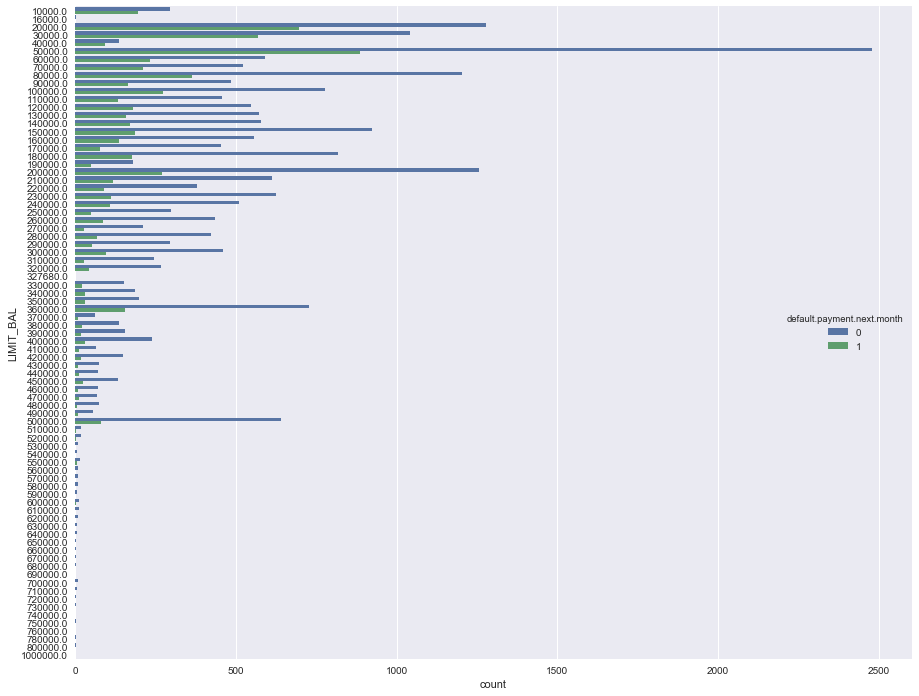

In [5]:
plt.figure(figsize=(15,12))
sns.set(font_scale=1)
limit_dist = sns.countplot(y='LIMIT_BAL',data=uci_dataset[['LIMIT_BAL','default.payment.next.month']], 
                           hue = 'default.payment.next.month'
                          )

#People with lower credit lines tend to have higher default occurences

<p>Interesting. People with lower credit balances are more prone to the likelihood of defaulting. With a little knowledge about how credit limit works, a higher limit is usually determined by income, credit history, and credit history. What this tells us is that be a good indicator of a person's stability, thus, they bear a better capacity of meeting their agreed minimum payments. <br></br>

<br>To put these values into scale, the current exchange for a TWD to USD is 1 USD : 0.0333 TWD.</br>

Of course, there are some fat cats in our data that skew our data. We should remove these outliers now, as they may negatively impact the performance of our model later on. </p>

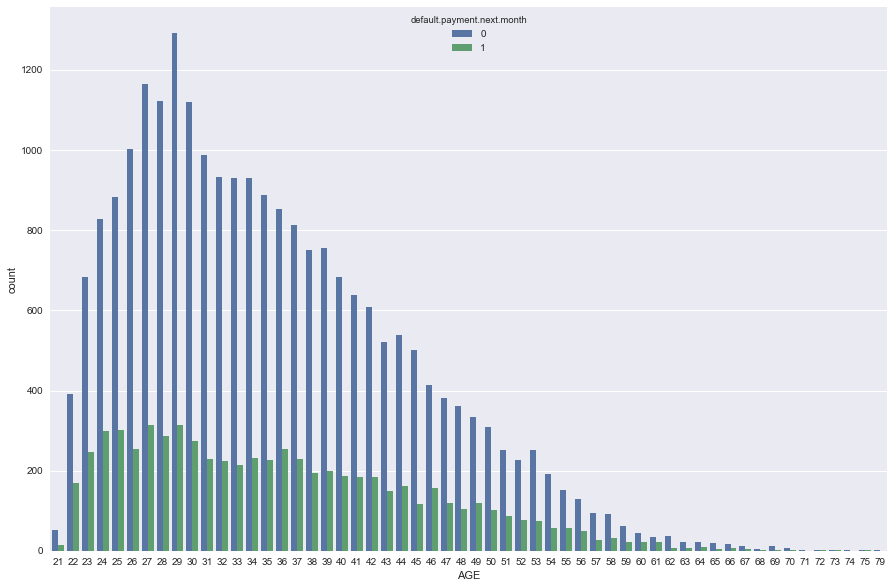

In [6]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
age_dist = sns.countplot(x='AGE', data=uci_dataset[['AGE','default.payment.next.month']], hue='default.payment.next.month')
#age is positively skewed


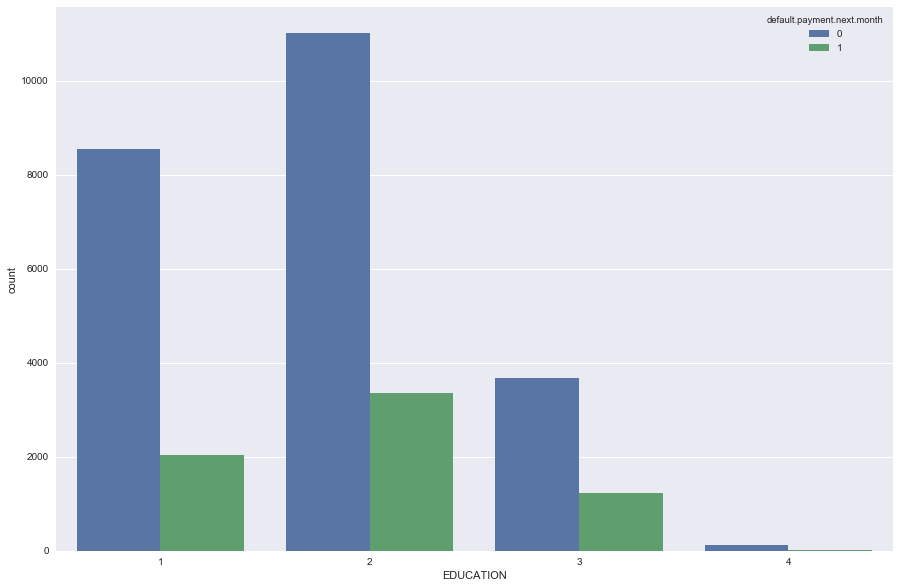

In [7]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)

ed_med=uci_dataset['EDUCATION'].median()

uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(0, ed_med)
uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(5, ed_med)
uci_dataset['EDUCATION'] = uci_dataset['EDUCATION'].replace(6, ed_med)

age_dist = sns.countplot(x='EDUCATION', data=uci_dataset[['EDUCATION', 'default.payment.next.month']], 
                         hue='default.payment.next.month')


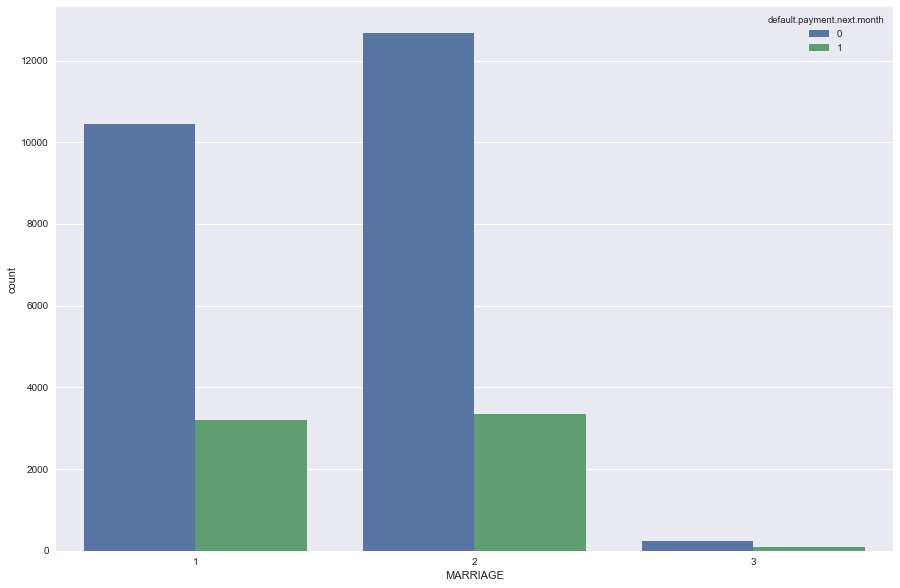

In [8]:
uci_dataset['MARRIAGE'] = uci_dataset['MARRIAGE'].replace(0, uci_dataset['MARRIAGE'].median())
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
age_dist = sns.countplot(x='MARRIAGE', data=uci_dataset[['MARRIAGE', 'default.payment.next.month']], 
                         hue='default.payment.next.month'
                         )

In [9]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
#sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
#pay_strip=plt.hist(uci_dataset[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])

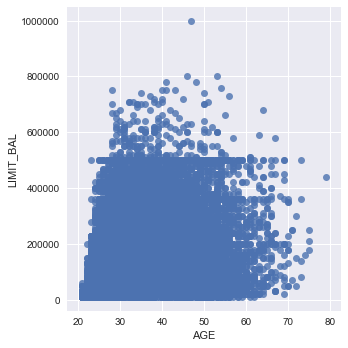

In [10]:
from scipy import stats

plt.figure(figsize=(15,10))
sns.set(font_scale=1)
sns.lmplot(x = 'AGE', y = 'LIMIT_BAL', data=uci_dataset, fit_reg=False)

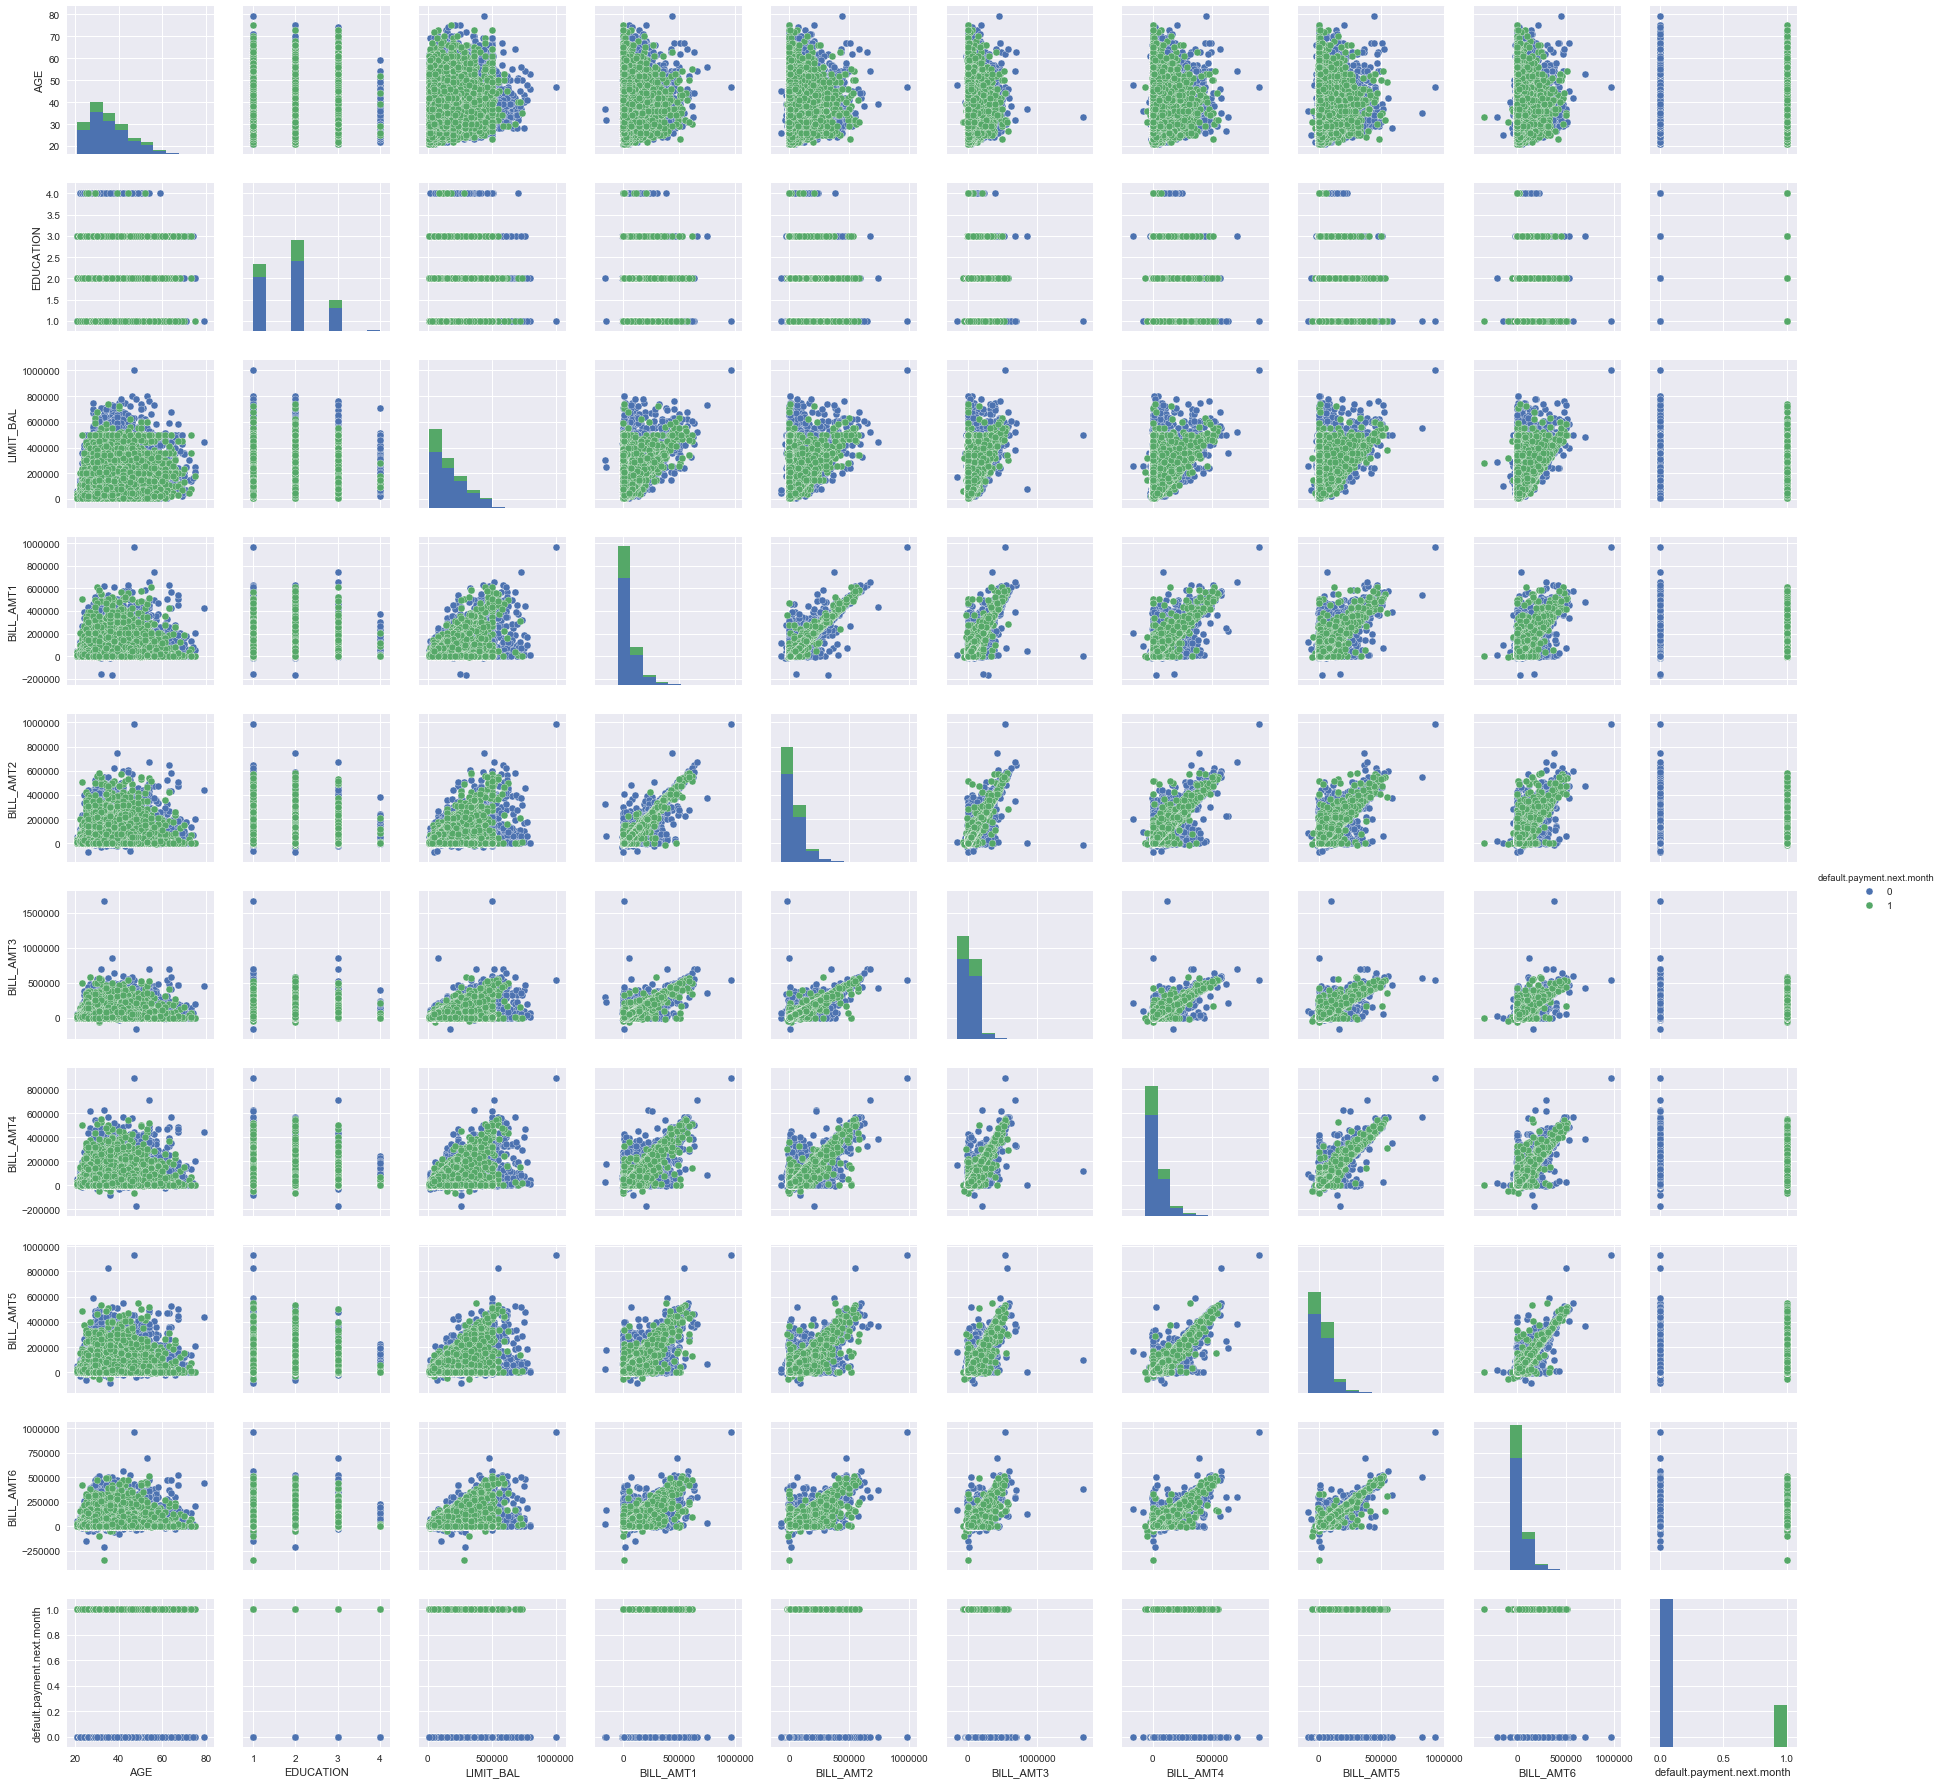

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
bill_amounts = uci_dataset[['AGE', 'EDUCATION', 'LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'default.payment.next.month']]
sns.pairplot(data=bill_amounts,hue="default.payment.next.month")

In [ ]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1)
bill_box = sns.pairplot(data=uci_dataset[['AGE', 'EDUCATION', 'LIMIT_BAL', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6', 'default.payment.next.month']],
                        hue='default.payment.next.month')

In [ ]:
plt.figure(figsize=(25,15))
corr_mat= uci_dataset.corr()
sns.heatmap(corr_mat, annot=True)

<h1>Baseline Modeling</h1>
Okay, there's enough EDA for now. We've discovered some interesting trends and patterns within the data itself -- we've ascertained a few hypothesis from the dataset. Factors such as

It's time to do some modeling, first off, it's important to reserve create a training and testing set this early on to prevent any data snooping affecting the performance of our model. Additionally, it'd be wise to have a scaled data set, since the currency we are dealing with results in fairly large numbers, and some models such as SVC are prone to sensitivity towards feature scales.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, neural_network, naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#create train test split

t_train, t_test = train_test_split(uci_dataset, train_size=0.8, test_size=0.2, random_state=42)

#create X and Y for fitting
Y = t_train['default.payment.next.month']
X = t_train.drop(['default.payment.next.month'],axis=1)
X = X.drop(['ID'],axis=1)


test_Y = t_test['default.payment.next.month']
t_test = t_test.drop(['ID','default.payment.next.month'], axis=1)
scaled_test = StandardScaler().fit_transform(t_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

clf_rf = RandomForestClassifier()
scaled_x = StandardScaler().fit_transform(X)
clf_svm = svm.SVC(C=1, kernel='rbf')
clf_nn = neural_network.MLPClassifier()
clf_nb = naive_bayes.GaussianNB()
clf_log = LogisticRegression()
clf_xgb = xgb.XGBClassifier()
clf_knn = KNeighborsClassifier()

#package our baseline models

clf_vot = VotingClassifier(estimators=[('lr', clf_log), 
                                       ('nn', clf_nn), 
                                       ('svm', clf_svm)])

models = {
          'Random Forest': clf_rf, 
          'SVM': clf_svm, 
          'NeuralNet': clf_nn, 
          'NaiveBayes': clf_nb,
          'Logistic Regression': clf_log, 
          'XGBoost': clf_xgb,
          'KNN': clf_knn 
         }
for modelname, model in models.items():
   score = cross_val_score(model, scaled_x, Y, cv=folds)
   print(modelname + 'cv_score:' + str(score.mean()))

In [ ]:

for modelname, model in models.items():
   model.fit(scaled_x, Y)
   m_pred = model.predict(scaled_test)
   print(modelname + ' test_score:' + str(metrics.accuracy_score(test_Y, m_pred)))

In [ ]:
clf_vot.fit(scaled_x,Y)

In [ ]:
pred = clf_vot.predict(scaled_test)
print('Ensemble score:', metrics.accuracy_score(test_Y, pred))

In [ ]:
sns.heatmap(metrics.confusion_matrix(test_Y, pred), annot=True)

In [ ]:
param_grid_rf = {
    'n_estimators': [200, 500, 700, 1000, 1500],
    'max_depth': [None, 3, 9, 16, 27, 36, 100]
}

param_grid_svm = {

}

param_grid_knn = {
    
}

param_grid_log = {

}

param_grid_nn = {
    
}

In [ ]:
grid_rf = GridSearchCV(clf_rf, param_grid=param_grid_rf, cv=10)

In [ ]:
grid_rf.fit(scaled_x,Y)

In [ ]:
print(grid_rf.best_estimator_)